In [1]:
# Base Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)
pd.set_option('display.width',1000)

# Set seed
np.random.seed(2023)

In [3]:
from urllib import request
import ssl

url="https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
html = response.read()

dow=pd.read_html(html)
dow[1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


In [4]:
dow_stocks = list(dow[1]['Symbol'])
dow_company_name = list(dow[1]['Company'])

In [5]:
# Use Comprehension to fetch data for multiple fields
dow_ohlc = {symbol: yf.download(symbol, start='2010-10-01', end='2022-05-31',auto_adjust=True, progress=False) for symbol in dow_stocks}

# Save dow_ohlc for future use
np.save('dow_ohlc.npy',dow_ohlc)

In [6]:
# Load dow_ohlc data
ohlc = np.load('dow_ohlc.npy', allow_pickle=True).item()
ohlc['MMM'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-10-01 00:00:00-04:00,59.921934,60.271675,59.592771,60.086521,3200900
2010-10-04 00:00:00-04:00,59.860257,60.161994,59.051056,59.455654,2286300
2010-10-05 00:00:00-04:00,59.873955,61.032896,59.873955,60.936890,4612200
2010-10-06 00:00:00-04:00,60.799719,61.650063,60.799719,61.643204,4137400
2010-10-07 00:00:00-04:00,61.622641,61.663785,60.648859,60.964310,3321900


In [7]:
# Perform Technical Analysis
for symbol in dow_stocks:
    high = ohlc[symbol]['High']
    low = ohlc[symbol]['Low']
    close = ohlc[symbol]['Close']
    ohlc[symbol]['ATR'] = ta.atr(high,low,close)

In [8]:
# Store stock prices in a dataframe
stock_price = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in dow_stocks})
stock_ret = stock_price.resample('W-FRI').last().pct_change()

# Check for missing values
stock_ret.isnull().sum()   

MMM       1
AXP       1
AMGN      1
AAPL      1
BA        1
CAT       1
CVX       1
CSCO      1
KO        1
DIS       1
DOW     443
GS        1
HD        1
HON       1
IBM       1
INTC      1
JNJ       1
JPM       1
MCD       1
MRK       1
MSFT      1
NKE       1
PG        1
CRM       1
TRV       1
UNH       1
VZ        1
V         1
WBA       1
WMT       1
dtype: int64

In [11]:
[stock_ret[x].index[stock_ret[x].apply(np.isnan)] for x in dow_stocks]

[DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-10-01 00:00:00-04:00'], dtype='datetime64[ns, Amer

In [12]:
stock_ret.fillna(method='ffill', axis=0,inplace=True)
stock_ret.drop(['DOW'],axis=1, inplace=True)
stock_ret.dropna(inplace=True)

In [13]:
stock_ret.shape

(608, 29)

In [15]:
np.isnan(stock_ret.any()).sum()

0

In [16]:
weekly_ret = stock_ret.T

In [18]:
weekly_ret

Date,2010-10-08 00:00:00-04:00,2010-10-15 00:00:00-04:00,2010-10-22 00:00:00-04:00,2010-10-29 00:00:00-04:00,2010-11-05 00:00:00-04:00,2010-11-12 00:00:00-05:00,2010-11-19 00:00:00-05:00,2010-11-26 00:00:00-05:00,2010-12-03 00:00:00-05:00,2010-12-10 00:00:00-05:00,2010-12-17 00:00:00-05:00,2010-12-24 00:00:00-05:00,2010-12-31 00:00:00-05:00,2011-01-07 00:00:00-05:00,2011-01-14 00:00:00-05:00,2011-01-21 00:00:00-05:00,2011-01-28 00:00:00-05:00,2011-02-04 00:00:00-05:00,2011-02-11 00:00:00-05:00,2011-02-18 00:00:00-05:00,2011-02-25 00:00:00-05:00,2011-03-04 00:00:00-05:00,2011-03-11 00:00:00-05:00,2011-03-18 00:00:00-04:00,2011-03-25 00:00:00-04:00,2011-04-01 00:00:00-04:00,2011-04-08 00:00:00-04:00,2011-04-15 00:00:00-04:00,2011-04-22 00:00:00-04:00,2011-04-29 00:00:00-04:00,2011-05-06 00:00:00-04:00,2011-05-13 00:00:00-04:00,2011-05-20 00:00:00-04:00,2011-05-27 00:00:00-04:00,2011-06-03 00:00:00-04:00,2011-06-10 00:00:00-04:00,2011-06-17 00:00:00-04:00,2011-06-24 00:00:00-04:00,2011-07-01 00:00:00-04:00,2011-07-08 00:00:00-04:00,2011-07-15 00:00:00-04:00,2011-07-22 00:00:00-04:00,2011-07-29 00:00:00-04:00,2011-08-05 00:00:00-04:00,2011-08-12 00:00:00-04:00,2011-08-19 00:00:00-04:00,2011-08-26 00:00:00-04:00,2011-09-02 00:00:00-04:00,2011-09-09 00:00:00-04:00,2011-09-16 00:00:00-04:00,2011-09-23 00:00:00-04:00,2011-09-30 00:00:00-04:00,2011-10-07 00:00:00-04:00,2011-10-14 00:00:00-04:00,2011-10-21 00:00:00-04:00,2011-10-28 00:00:00-04:00,2011-11-04 00:00:00-04:00,2011-11-11 00:00:00-05:00,2011-11-18 00:00:00-05:00,2011-11-25 00:00:00-05:00,2011-12-02 00:00:00-05:00,2011-12-09 00:00:00-05:00,2011-12-16 00:00:00-05:00,2011-12-23 00:00:00-05:00,2011-12-30 00:00:00-05:00,2012-01-06 00:00:00-05:00,2012-01-13 00:00:00-05:00,2012-01-20 00:00:00-05:00,2012-01-27 00:00:00-05:00,2012-02-03 00:00:00-05:00,2012-02-10 00:00:00-05:00,2012-02-17 00:00:00-05:00,2012-02-24 00:00:00-05:00,2012-03-02 00:00:00-05:00,2012-03-09 00:00:00-05:00,2012-03-16 00:00:00-04:00,2012-03-23 00:00:00-04:00,2012-03-30 00:00:00-04:00,2012-04-06 00:00:00-04:00,2012-04-13 00:00:00-04:00,2012-04-20 00:00:00-04:00,2012-04-27 00:00:00-04:00,2012-05-04 00:00:00-04:00,2012-05-11 00:00:00-04:00,2012-05-18 00:00:00-04:00,2012-05-25 00:00:00-04:00,2012-06-01 00:00:00-04:00,2012-06-08 00:00:00-04:00,2012-06-15 00:00:00-04:00,2012-06-22 00:00:00-04:00,2012-06-29 00:00:00-04:00,2012-07-06 00:00:00-04:00,2012-07-13 00:00:00-04:00,2012-07-20 00:00:00-04:00,2012-07-27 00:00:00-04:00,2012-08-03 00:00:00-04:00,2012-08-10 00:00:00-04:00,2012-08-17 00:00:00-04:00,2012-08-24 00:00:00-04:00,2012-08-31 00:00:00-04:00,2012-09-07 00:00:00-04:00,2012-09-14 00:00:00-04:00,2012-09-21 00:00:00-04:00,2012-09-28 00:00:00-04:00,2012-10-05 00:00:00-04:00,2012-10-12 00:00:00-04:00,2012-10-19 00:00:00-04:00,2012-10-26 00:00:00-04:00,2012-11-02 00:00:00-04:00,2012-11-09 00:00:00-05:00,2012-11-16 00:00:00-05:00,2012-11-23 00:00:00-05:00,2012-11-30 00:00:00-05:00,2012-12-07 00:00:00-05:00,2012-12-14 00:00:00-05:00,2012-12-21 00:00:00-05:00,2012-12-28 00:00:00-05:00,2013-01-04 00:00:00-05:00,2013-01-11 00:00:00-05:00,2013-01-18 00:00:00-05:00,2013-01-25 00:00:00-05:00,2013-02-01 00:00:00-05:00,2013-02-08 00:00:00-05:00,2013-02-15 00:00:00-05:00,2013-02-22 00:00:00-05:00,2013-03-01 00:00:00-05:00,2013-03-08 00:00:00-05:00,2013-03-15 00:00:00-04:00,2013-03-22 00:00:00-04:00,2013-03-29 00:00:00-04:00,2013-04-05 00:00:00-04:00,2013-04-12 00:00:00-04:00,2013-04-19 00:00:00-04:00,2013-04-26 00:00:00-04:00,2013-05-03 00:00:00-04:00,2013-05-10 00:00:00-04:00,2013-05-17 00:00:00-04:00,2013-05-24 00:00:00-04:00,2013-05-31 00:00:00-04:00,2013-06-07 00:00:00-04:00,2013-06-14 00:00:00-04:00,2013-06-21 00:00:00-04:00,2013-06-28 00:00:00-04:00,2013-07-05 00:00:00-04:00,2013-07-12 00:00:00-04:00,2013-07-19 00:00:00-04:00,2013-07-26 00:00:00-04:00,2013-08-02 00:00:00-04:00,2013-08-09 00:00:00-04:00,2013-08-16 00:00:00-04:00,2013-08-23 00:00:00-04:00,2013-08-30 00:00:00-04:00,2013-09-06 00:00:00-04:00,2013-09-13 00:00:

In [19]:
stock_atr = pd.DataFrame({symbol: ohlc[symbol]['ATR'] for symbol in dow_stocks})
stock_atr = stock_atr.resample('W-FRI').mean()

In [21]:
# Fill backward teh missing values and drop DOW from the list
stock_atr.fillna(method='bfill', axis=0, inplace=True)
stock_atr.drop(['DOW'],axis = 1, inplace = True)

In [22]:
stock_atr.shape

(609, 29)

In [23]:
np.isnan(stock_ret.any()).sum()

0

In [24]:
weekly_atr = stock_atr.T
weekly_atr.head()

Date,2010-10-01 00:00:00-04:00,2010-10-08 00:00:00-04:00,2010-10-15 00:00:00-04:00,2010-10-22 00:00:00-04:00,2010-10-29 00:00:00-04:00,2010-11-05 00:00:00-04:00,2010-11-12 00:00:00-05:00,2010-11-19 00:00:00-05:00,2010-11-26 00:00:00-05:00,2010-12-03 00:00:00-05:00,2010-12-10 00:00:00-05:00,2010-12-17 00:00:00-05:00,2010-12-24 00:00:00-05:00,2010-12-31 00:00:00-05:00,2011-01-07 00:00:00-05:00,2011-01-14 00:00:00-05:00,2011-01-21 00:00:00-05:00,2011-01-28 00:00:00-05:00,2011-02-04 00:00:00-05:00,2011-02-11 00:00:00-05:00,2011-02-18 00:00:00-05:00,2011-02-25 00:00:00-05:00,2011-03-04 00:00:00-05:00,2011-03-11 00:00:00-05:00,2011-03-18 00:00:00-04:00,2011-03-25 00:00:00-04:00,2011-04-01 00:00:00-04:00,2011-04-08 00:00:00-04:00,2011-04-15 00:00:00-04:00,2011-04-22 00:00:00-04:00,2011-04-29 00:00:00-04:00,2011-05-06 00:00:00-04:00,2011-05-13 00:00:00-04:00,2011-05-20 00:00:00-04:00,2011-05-27 00:00:00-04:00,2011-06-03 00:00:00-04:00,2011-06-10 00:00:00-04:00,2011-06-17 00:00:00-04:00,2011-06-24 00:00:00-04:00,2011-07-01 00:00:00-04:00,2011-07-08 00:00:00-04:00,2011-07-15 00:00:00-04:00,2011-07-22 00:00:00-04:00,2011-07-29 00:00:00-04:00,2011-08-05 00:00:00-04:00,2011-08-12 00:00:00-04:00,2011-08-19 00:00:00-04:00,2011-08-26 00:00:00-04:00,2011-09-02 00:00:00-04:00,2011-09-09 00:00:00-04:00,2011-09-16 00:00:00-04:00,2011-09-23 00:00:00-04:00,2011-09-30 00:00:00-04:00,2011-10-07 00:00:00-04:00,2011-10-14 00:00:00-04:00,2011-10-21 00:00:00-04:00,2011-10-28 00:00:00-04:00,2011-11-04 00:00:00-04:00,2011-11-11 00:00:00-05:00,2011-11-18 00:00:00-05:00,2011-11-25 00:00:00-05:00,2011-12-02 00:00:00-05:00,2011-12-09 00:00:00-05:00,2011-12-16 00:00:00-05:00,2011-12-23 00:00:00-05:00,2011-12-30 00:00:00-05:00,2012-01-06 00:00:00-05:00,2012-01-13 00:00:00-05:00,2012-01-20 00:00:00-05:00,2012-01-27 00:00:00-05:00,2012-02-03 00:00:00-05:00,2012-02-10 00:00:00-05:00,2012-02-17 00:00:00-05:00,2012-02-24 00:00:00-05:00,2012-03-02 00:00:00-05:00,2012-03-09 00:00:00-05:00,2012-03-16 00:00:00-04:00,2012-03-23 00:00:00-04:00,2012-03-30 00:00:00-04:00,2012-04-06 00:00:00-04:00,2012-04-13 00:00:00-04:00,2012-04-20 00:00:00-04:00,2012-04-27 00:00:00-04:00,2012-05-04 00:00:00-04:00,2012-05-11 00:00:00-04:00,2012-05-18 00:00:00-04:00,2012-05-25 00:00:00-04:00,2012-06-01 00:00:00-04:00,2012-06-08 00:00:00-04:00,2012-06-15 00:00:00-04:00,2012-06-22 00:00:00-04:00,2012-06-29 00:00:00-04:00,2012-07-06 00:00:00-04:00,2012-07-13 00:00:00-04:00,2012-07-20 00:00:00-04:00,2012-07-27 00:00:00-04:00,2012-08-03 00:00:00-04:00,2012-08-10 00:00:00-04:00,2012-08-17 00:00:00-04:00,2012-08-24 00:00:00-04:00,2012-08-31 00:00:00-04:00,2012-09-07 00:00:00-04:00,2012-09-14 00:00:00-04:00,2012-09-21 00:00:00-04:00,2012-09-28 00:00:00-04:00,2012-10-05 00:00:00-04:00,2012-10-12 00:00:00-04:00,2012-10-19 00:00:00-04:00,2012-10-26 00:00:00-04:00,2012-11-02 00:00:00-04:00,2012-11-09 00:00:00-05:00,2012-11-16 00:00:00-05:00,2012-11-23 00:00:00-05:00,2012-11-30 00:00:00-05:00,2012-12-07 00:00:00-05:00,2012-12-14 00:00:00-05:00,2012-12-21 00:00:00-05:00,2012-12-28 00:00:00-05:00,2013-01-04 00:00:00-05:00,2013-01-11 00:00:00-05:00,2013-01-18 00:00:00-05:00,2013-01-25 00:00:00-05:00,2013-02-01 00:00:00-05:00,2013-02-08 00:00:00-05:00,2013-02-15 00:00:00-05:00,2013-02-22 00:00:00-05:00,2013-03-01 00:00:00-05:00,2013-03-08 00:00:00-05:00,2013-03-15 00:00:00-04:00,2013-03-22 00:00:00-04:00,2013-03-29 00:00:00-04:00,2013-04-05 00:00:00-04:00,2013-04-12 00:00:00-04:00,2013-04-19 00:00:00-04:00,2013-04-26 00:00:00-04:00,2013-05-03 00:00:00-04:00,2013-05-10 00:00:00-04:00,2013-05-17 00:00:00-04:00,2013-05-24 00:00:00-04:00,2013-05-31 00:00:00-04:00,2013-06-07 00:00:00-04:00,2013-06-14 00:00:00-04:00,2013-06-21 00:00:00-04:00,2013-06-28 00:00:00-04:00,2013-07-05 00:00:00-04:00,2013-07-12 00:00:00-04:00,2013-07-19 00:00:00-04:00,2013-07-26 00:00:00-04:00,2013-08-02 00:00:00-04:00,2013-08-09 00:00:00-04:00,2013-08-16 00:00:00-04:00,2013-08-23 00:00:00-04:00,2013-08-30 00:00:00-04:00,2013-09-06 00:00:

In [25]:
weekly_atr.T.describe()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,2.084425,1.765570,2.839560,1.096812,4.430527,2.425917,1.656613,0.568409,0.522628,1.888663,4.112321,2.608305,1.912248,1.859944,0.749183,1.432559,1.518300,1.911075,0.866624,1.946880,1.333025,1.151186,2.922642,1.629758,3.579082,0.569957,2.023609,1.044996,1.270030
std,1.107571,1.347720,1.661229,1.239697,3.762450,1.465966,0.847849,0.357656,0.306489,1.311319,2.225378,2.415987,1.426555,0.608696,0.528352,0.895245,1.081913,1.470498,0.491580,2.208038,1.110518,0.801616,2.332815,1.035529,3.265409,0.246033,1.887604,0.394888,0.820668
min,0.684909,0.628391,0.627538,0.114892,0.806385,0.804170,0.700733,0.202045,0.186913,0.475661,1.663328,0.397044,0.575482,0.907376,0.185321,0.373538,0.535415,0.547701,0.266083,0.284980,0.243713,0.418275,0.851663,0.495666,0.562095,0.226382,0.272101,0.365285,0.411845
25%,1.158369,0.933324,1.711222,0.339125,1.628967,1.313155,1.088042,0.304229,0.338318,0.958197,2.562214,0.879971,0.952210,1.450876,0.366674,0.830100,0.744852,0.895312,0.519348,0.541208,0.516534,0.663578,1.333813,0.865672,1.090394,0.411618,0.697345,0.771474,0.732971
50%,1.755002,1.208028,2.579522,0.540066,2.348469,1.766770,1.382677,0.402180,0.436233,1.394731,3.435918,1.622517,1.292801,1.744501,0.514580,1.170876,1.092947,1.310163,0.742890,0.882314,0.905422,0.865524,1.741033,1.248522,2.135346,0.516733,1.158159,1.057381,0.945719
75%,2.772787,2.021015,3.805036,1.124408,7.327025,3.100200,1.986982,0.783446,0.596074,2.422811,4.462457,3.422088,2.549337,2.107478,1.059525,1.954562,2.005772,2.662541,1.133866,2.430987,1.633224,1.397953,3.872334,2.158970,5.440633,0.673885,2.928427,1.255913,1.611106
max,7.818707,8.534330,11.428008,5.847722,22.202176,6.946222,5.822201,2.437696,2.729953,8.119647,12.754111,14.841190,10.609190,5.868219,3.779690,6.602114,7.439126,12.296720,3.553750,10.139325,6.335802,6.551033,12.118897,7.472145,20.232685,2.354479,11.806198,3.153687,6.314879


In [26]:
# Import sklearn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from datetime import datetime

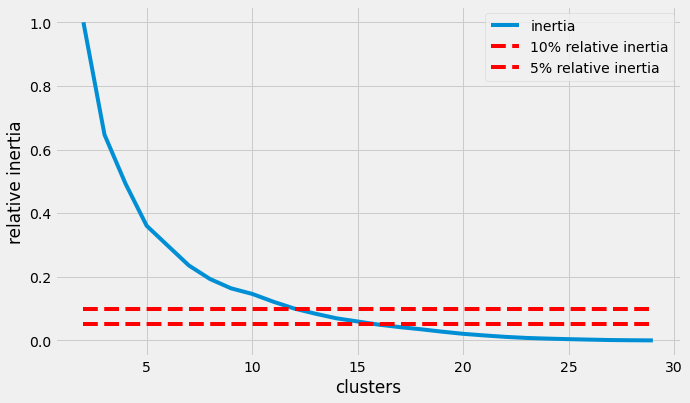

In [28]:
n_clusters = range(2,30)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(weekly_atr)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters,np.divide(inertia,inertia[0]))
plt.hlines(0.1,n_clusters[0],n_clusters[-1],'r',linestyles='dashed')
plt.hlines(0.05,n_clusters[0],n_clusters[-1],'r',linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia','10% relative inertia','5% relative inertia']);

In [29]:
# Normalize and fit the model
model = Pipeline([
    ("normalization",MinMaxScaler()),
    ("cluster",KMeans(n_clusters=15))
])

In [30]:
model.fit(weekly_atr)

labels = model.predict(weekly_atr)

In [31]:
labels

array([14,  6,  7, 12,  3, 10,  4,  5,  5,  6,  2, 11,  6, 13,  5,  0,  0,
        6,  5,  9, 12,  0,  1,  6,  8,  5,  9,  0,  0])

In [33]:
weekly_ret.mean(axis=1)

MMM     0.001814
AXP     0.003407
AMGN    0.003487
AAPL    0.005442
BA      0.003188
CAT     0.002958
CVX     0.002705
CSCO    0.002346
KO      0.002196
DIS     0.002728
GS      0.002402
HD      0.004750
HON     0.003451
IBM     0.001273
INTC    0.002633
JNJ     0.002567
JPM     0.003218
MCD     0.002830
MRK     0.002633
MSFT    0.004881
NKE     0.003738
PG      0.002322
CRM     0.003962
TRV     0.002910
UNH     0.005288
VZ      0.001904
V       0.004685
WBA     0.001641
WMT     0.002251
dtype: float64

In [38]:
companies = stock_atr.columns

companies_name = dow_company_name
companies_name.remove('Dow')

ValueError: list.remove(x): x not in list

In [39]:
df = pd.DataFrame({'Cluster': labels,
                  'Companies Name': companies_name,
                  'Companies': companies,
                  'ATR': weekly_atr.mean(axis=1),
                  'CHG': weekly_ret.mean(axis=1)}
                 ).sort_values(by=['Cluster'], axis=0)
df = df.reset_index(drop=True)
df

,Cluster,Companies Name,Companies,ATR,CHG
0,0,Walmart,WMT,1.270030,0.002251
1,0,Procter & Gamble,PG,1.151186,0.002322
2,0,JPMorgan Chase,JPM,1.518300,0.003218
3,0,Johnson & Johnson,JNJ,1.432559,0.002567
4,0,Walgreens Boots Alliance,WBA,1.044996,0.001641
5,1,Salesforce,CRM,2.922642,0.003962
6,2,Goldman Sachs,GS,4.112321,0.002402
7,3,Boeing,BA,4.430527,0.003188
8,4,Chevron,CVX,1.656613,0.002705
9,5,Verizon,VZ,0.569957,0.001904


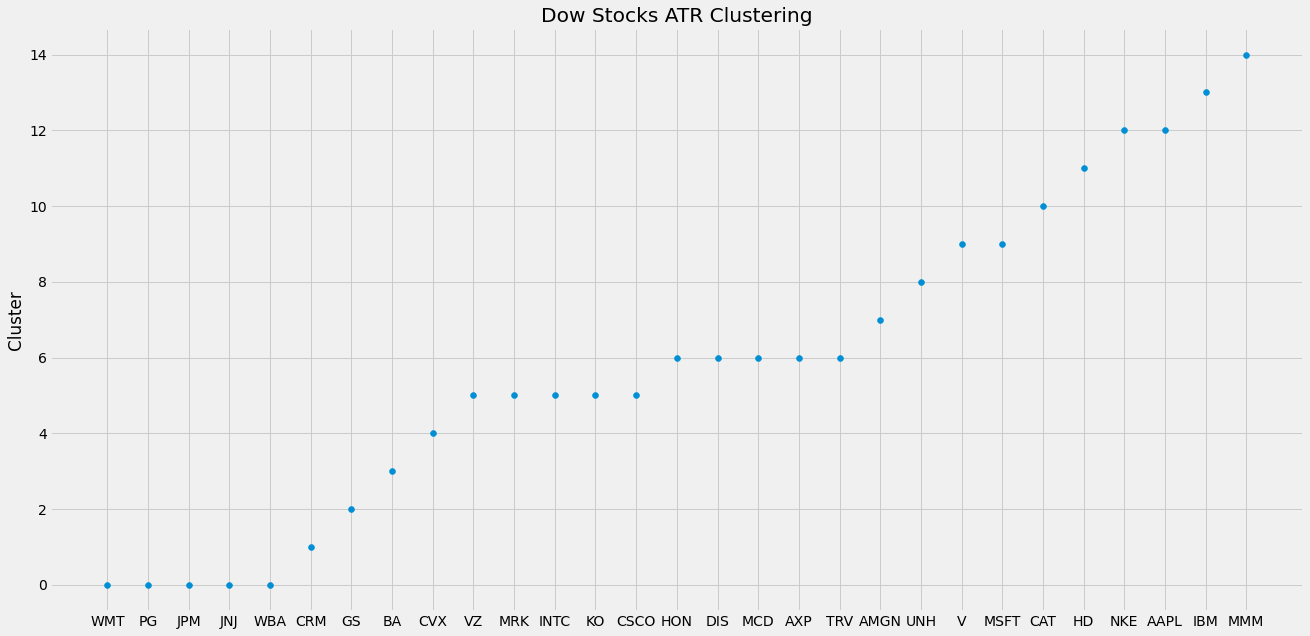

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(df.Companies, df.Cluster)
# plt.xlabel('Stocks')
plt.ylabel('Cluster')
plt.title('Dow Stocks ATR Clustering');

In [41]:
model.get_params()

{'memory': None,
 'steps': [('normalization', MinMaxScaler()),
  ('cluster', KMeans(n_clusters=15))],
 'verbose': False,
 'normalization': MinMaxScaler(),
 'cluster': KMeans(n_clusters=15),
 'normalization__clip': False,
 'normalization__copy': True,
 'normalization__feature_range': (0, 1),
 'cluster__algorithm': 'auto',
 'cluster__copy_x': True,
 'cluster__init': 'k-means++',
 'cluster__max_iter': 300,
 'cluster__n_clusters': 15,
 'cluster__n_init': 10,
 'cluster__random_state': None,
 'cluster__tol': 0.0001,
 'cluster__verbose': 0}

In [42]:
model['cluster'].cluster_centers_

array([[0.14066389, 0.14066389, 0.14066389, ..., 0.13976008, 0.16380881,
        0.17731779],
       [0.35888384, 0.35888384, 0.35888384, ..., 0.56681149, 0.5659077 ,
        0.52459672],
       [1.        , 1.        , 1.        , ..., 0.68622123, 0.6663538 ,
        0.70338999],
       ...,
       [0.01619514, 0.01619514, 0.01619514, ..., 0.33173505, 0.33014688,
        0.33720948],
       [0.3962957 , 0.3962957 , 0.3962957 , ..., 0.15889347, 0.18105696,
        0.19304761],
       [0.29956596, 0.29956596, 0.29956596, ..., 0.20101961, 0.20196035,
        0.21245921]])

In [43]:
model['cluster'].cluster_centers_.shape

(15, 609)

In [44]:
df.to_csv('cluster_new.csv')